## Лабораторная работа 8: Построение пайплайна одномерной регрессии
Суть: Создание автоматизированного пайплайна для задач одномерной регрессии, включая обработку данных, обучение и тестирование.

Разделение данных на обучающую и тестовую выборки: Разделение набора данных для обучения (80%) и проверки модели (20%).

Стандартизация: Преобразование данных таким образом, чтобы их среднее значение стало 0, а стандартное отклонение — 1.

Применение моделей: Использование ML-алгоритмов для решения задач (например, линейная регрессия).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
dataset = pd.read_csv('./Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print("Матрица признаков");
print(X[:5])
print("Зависимая переменная");
print(y[:5])

Матрица признаков
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
Зависимая переменная
[39343. 46205. 37731. 43525. 39891.]


**Разделение выборки на тестовую и тренировочную**

In [5]:
# from sklearn.cross validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

**Обучение линейной модели регрессии**

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Предсказание, обработка и визуализация результатов**

In [7]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


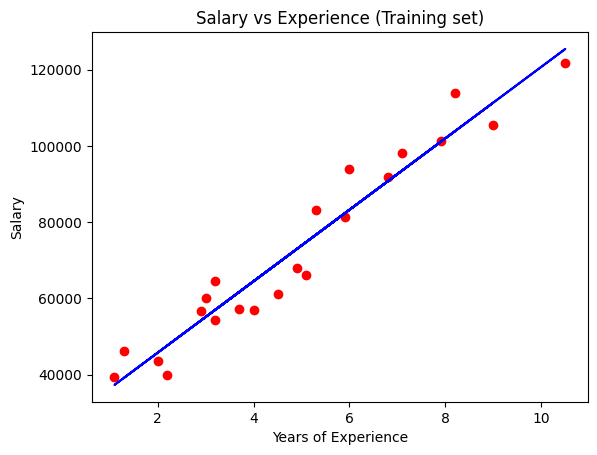

In [8]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

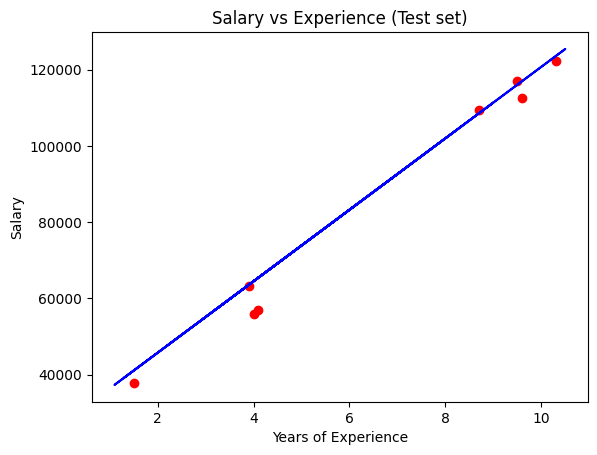

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Индивидуальное задание**

**Загрузка данных и предварительный просмотр**

In [10]:
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [11]:
# Чтение данных из загруженного файла
dataset = pd.read_csv('WineQT.csv')

# Просмотр первых строк данных
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Выбор признаков

**Используем колонки alcohol (содержание алкоголя) и quality (качество вина):**

In [12]:
# Выбор нужных колонок
X = dataset[['alcohol']].values  # Признак, независимая переменная (например, содержание алкоголя)
y = dataset['quality'].values  # Целевая переменная (например, оценка качества вина)

# Просмотр первых пяти строк
print("Матрица признаков (первые 5 строк):")
print(X[:5])
print("Целевая переменная (первые 5 строк):")
print(y[:5])


Матрица признаков (первые 5 строк):
[[9.4]
 [9.8]
 [9.8]
 [9.8]
 [9.4]]
Целевая переменная (первые 5 строк):
[5 5 5 6 5]


**Разделение данных на тренировочную и тестовую выборки**

In [13]:
from sklearn.model_selection import train_test_split

# Разделение данных: 75% на тренировку, 25% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Обучение линейной модели регрессии**

In [14]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели
regressor = LinearRegression() # Создается объект regressor, представляющий модель линейной регрессии.
regressor.fit(X_train, y_train)

LinearRegression()

**Предсказание и визуализация**

In [15]:
# Предсказание на тестовых данных
y_pred = regressor.predict(X_test) # Использует массив тестовых признаков. Метод для вычисления предсказанных значений целевой переменной на основе данных признаков

# Вывод предсказанных значений
print("Предсказания:")
print(y_pred)

Предсказания:
[5.36177769 5.98695842 5.18811638 5.6396358  5.32704543 5.6396358
 5.39650996 5.81329711 5.98695842 5.43124222 5.29231317 5.98695842
 5.74383259 5.25758091 6.12588748 5.18811638 5.74383259 5.22284864
 5.18811638 5.50070675 5.53543901 5.32704543 5.32704543 5.32704543
 5.29231317 5.08391959 5.22284864 5.81329711 5.9174939  5.43124222
 5.32704543 5.57017127 5.9174939  5.43124222 5.36177769 5.77856485
 5.98695842 5.46597448 5.22284864 5.95222616 5.43124222 6.23008426
 5.53543901 5.98695842 5.39650996 5.29231317 5.32704543 5.77856485
 6.12588748 6.26481653 5.50070675 5.88276164 5.67436806 6.195352
 5.32704543 5.22284864 5.50070675 5.25758091 5.29231317 5.9174939
 5.74383259 5.18811638 5.39650996 5.43124222 5.50070675 5.29231317
 6.33428105 5.22284864 5.60490353 5.67436806 5.32704543 5.53543901
 5.6396358  6.23008426 5.98695842 6.29954879 6.16061974 6.02169069
 5.50070675 6.05642295 5.18811638 5.81329711 5.67436806 5.25758091
 6.195352   5.50070675 5.84802937 5.36177769 5.50070

**Визуализация для тренировочного набора**

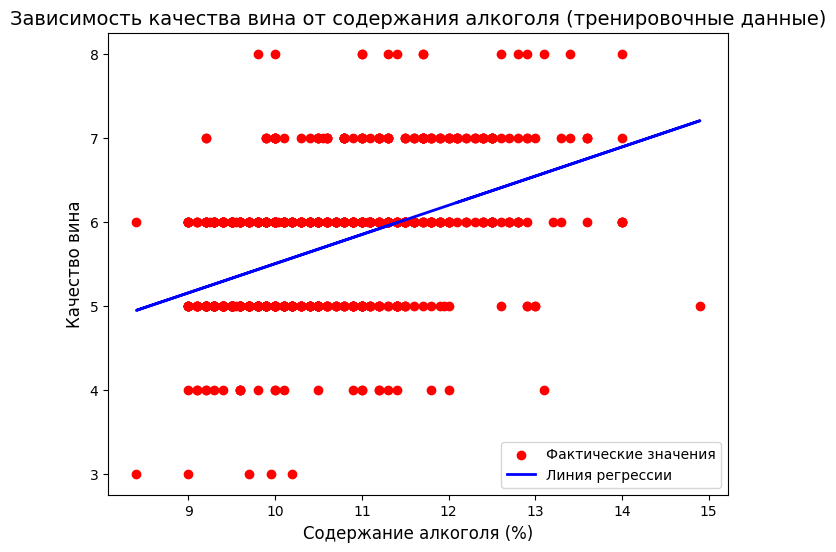

In [16]:
# Визуализация данных и модели на тренировочной выборке для данных о вине
plt.figure(figsize=(8, 6))

# Диаграмма рассеяния для фактических значений
plt.scatter(X_train, y_train, color='red', label='Фактические значения')

# Линия регрессии на основе предсказаний модели
plt.plot(X_train, regressor.predict(X_train), color='blue', linewidth=2, label='Линия регрессии')

# Настройка заголовка и подписей осей
plt.title('Зависимость качества вина от содержания алкоголя (тренировочные данные)', fontsize=14)
plt.xlabel('Содержание алкоголя (%)', fontsize=12)
plt.ylabel('Качество вина', fontsize=12)
plt.legend(fontsize=10)

# Отображение графика
plt.show()


Вывод:

На графике видно, что качество вина имеет слабую положительную корреляцию с содержанием алкоголя. Линия регрессии показывает общий тренд: с увеличением содержания алкоголя качество вина слегка возрастает. Однако значительная часть данных имеет разброс, что говорит о том, что алкоголь не является единственным фактором, влияющим на качество.

**Визуализация для тестового набора**

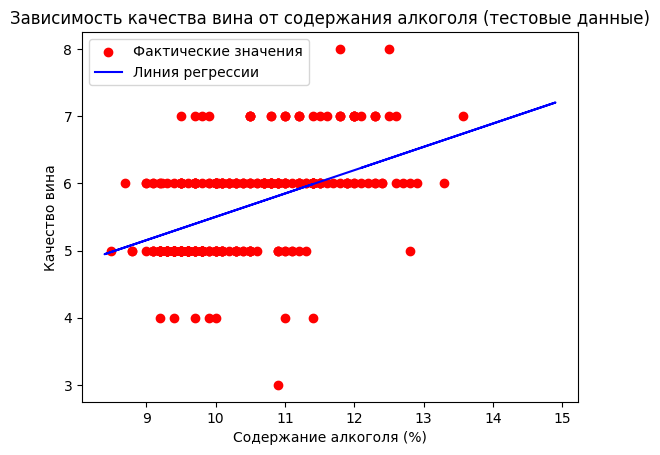

In [17]:
# Строим диаграмму рассеяния
plt.scatter(X_test, y_test, color='red', label='Фактические значения')
# Строим линию, представляющую предсказания модели, используя тренировочные данные
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Линия регрессии')
plt.title('Зависимость качества вина от содержания алкоголя (тестовые данные)')
plt.xlabel('Содержание алкоголя (%)')
plt.ylabel('Качество вина')
plt.legend()
plt.show()


Выводы:

Линия регрессии показывает положительную зависимость между содержанием алкоголя (%) и качеством вина: с увеличением содержания алкоголя качество вина, как правило, возрастает.
Однако фактические данные имеют значительное рассеяние вокруг линии, что указывает на наличие других факторов, влияющих на качество вина, помимо содержания алкоголя.